In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [185]:
# Import the dataset - anime

anime = pd.read_csv("anime.csv")
anime.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [20]:
print(anime.shape)
print(anime.dtypes)

(12294, 7)
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


In [5]:
# Import the dataset - rating

rate = pd.read_csv("rating.csv")
rate.head(3)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1


In [21]:
print(rate.shape)
print(rate.dtypes)

(7813737, 3)
user_id     int64
anime_id    int64
rating      int64
dtype: object


In [186]:
# Check missing values in anime data

def num_missing(x):
    return sum(x.isnull())

#Apply per column

print ("Missing values per column in anime data:")
print (anime.apply(num_missing, axis=0))

Missing values per column in anime data:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [187]:
# Check missing values in rate data

def num_missing(x):
    return sum(x.isnull())

#Apply per column

print ("Missing values per column in rate data:")
print (rate.apply(num_missing, axis=0))

Missing values per column in rate data:
user_id     0
anime_id    0
rating      0
dtype: int64


### Explore and process the data

In [188]:
# Check the values in the column genre

anime.genre.unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen', ...,
       'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [189]:
# Fill the missing values in the column genre with the word 'missing'

anime['genre'] = anime['genre'].fillna("missing")

In [190]:
# Return unique genres 

a = anime.genre.unique().tolist()

b=[]
for i in a:
    b.append(i.split(','))
    
c = []
for list in b:
    for number in list:
        c.append(number)

c = [x.strip(' ') for x in c]
c = set(c)

unique_genre = []
for i in c:
    unique_genre.append(i)

print('Number of unique genre is '+str(len(unique_genre)))
print(unique_genre[0:10])

Number of unique genre is 44
['Thriller', 'Ecchi', 'Yaoi', 'Dementia', 'Harem', 'Police', 'Josei', 'Mecha', 'Yuri', 'Music']


In [191]:
# Create new columns with each of unique genres
for i in unique_genre:
    anime[i] = 0
    
# Replace the value of the newly created columns to '1' if the row has the genre of the column in the column 'genre'
for i, clmn in enumerate(anime[unique_genre].columns):
    anime.loc[anime['genre'].str.contains(clmn), clmn] = 1
    
# Remove the column 'genre' as it has been dummy-coded
anime = anime.drop('genre', axis=1)

In [192]:
# Check the distribution of number of type

anime.type.value_counts().head(10)

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [206]:
# Fill the missing values in the column type with mode

anime['type'] = anime['type'].fillna('TV')

In [209]:
# Dummy-code the column type
dummy = pd.get_dummies(anime[['type']])

# Remove the column 'type' as it has been dummy-coded
anime = anime.drop('type', axis=1)

# Add dummy-coded data to the original dataset
anime = pd.concat([anime, dummy], axis=1)

In [194]:
# Check the distribution of number of episode

anime.episodes.value_counts().head(10)

1          5677
2          1076
12          816
13          572
26          514
3           505
Unknown     340
4           327
6           268
24          181
Name: episodes, dtype: int64

In [195]:
# Check the distribution of number of episode without the value 'Unknown'

a = anime[anime.episodes != 'Unknown']
a['episodes'] = a['episodes'].astype('int')

a.episodes.describe()

/Users/kayounglee/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


count    11954.000000
mean        12.382550
std         46.865352
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       1818.000000
Name: episodes, dtype: float64

- Value distribution is extremely right-skewed with 75% of the values equal or below 12
- I decided to convert to the categorical variable with the cutoff of 12
- Since the episode of 1 indicates movie, it is worth keeping it as indepdent level
- I decided to replace 'Unknown' with the mode level

In [196]:
# Repleace 'Unknown' with the number 2 and change the data type of the colum
anime.loc[anime.episodes == 'Unknown', 'episodes'] = 2
anime['episodes'] = anime['episodes'].astype('int')

# Create a new column 'episode_1' and fill with '1' with the value in the column episodes is 1
anime['episode_1'] = 0
anime.loc[anime.episodes == 1, 'episode_1'] =1

# Create a new column 'episode_2to12' and fill with '1' with the value in the column episodes is between 2 and 12
anime['episode_2to12'] = 0
anime.loc[(anime.episodes < 13)&(anime.episodes > 1), 'episode_2to12'] =1

# Create a new column 'episode_13+' and fill with '1' with the value in the column episodes is larger than 12
anime['episode_13+'] = 0
anime.loc[anime.episodes > 12, 'episode_13+'] =1

# Remove the column episodes as it has been transformed to three categorical variables
anime = anime.drop('episodes', axis=1)

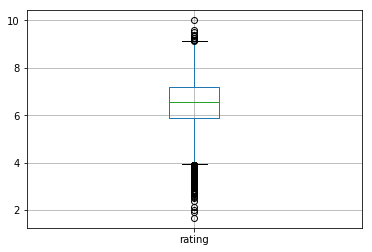

In [17]:
# Check the distribution of rating in the anime dataset

fig = plt.figure(1, figsize=(2, 4))
anime.boxplot(column="rating")
plt.show()

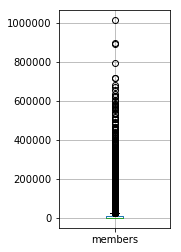

In [24]:
# Check the distribution of members

fig = plt.figure(1, figsize=(2, 4))
anime.boxplot(column="members")
plt.show()

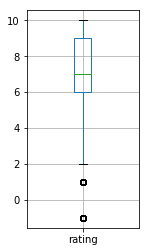

In [25]:
# Check the distribution of rating in the rate dataset

fig = plt.figure(1, figsize=(2, 4))
rate.boxplot(column="rating")
plt.show()

- '-1' if the user watched it but didn't assign a rating according to the data dictionary

In [215]:
# Save the dataframe into a pickle file

pickle.dump( anime, open( "anime.pickle", "wb" ) )
pickle.dump( rate, open( "rate.pickle", "wb" ) )

## Collaborative filtering

In [ ]:
# Load the dataframe back from the pickle file.

anime = pickle.load( open( "anime.pickle", "rb" ) )
rate = pickle.load( open( "rate.pickle", "rb" ) )